In [1]:
from math import pi
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import wavio
import IPython
from scipy.io.wavfile import write, read
import sys
import coupledIIR as cf

In [2]:
fs = 48000
length = 8192
factor = np.sqrt(2)/2

fc1 = 600
fc2 = 1200
fc3 = 4800
fc4 = 300

F1, F1_ = cf.Butterworth18dB(fc1, fs, True)
F2, F2_ = cf.Butterworth18dB(fc2, fs, True)
F3, F3_ = cf.Butterworth18dB(fc3, fs, True)
F4, F4_ = cf.Butterworth18dB(fc4, fs, True)
A1 = [F1[0] + F1_[0], F1_[1]]
A2 = [F2[0] + F2_[0], F2_[1]]
A3 = [F3[0] + F3_[0], F3_[1]]

## Filterbank Struct

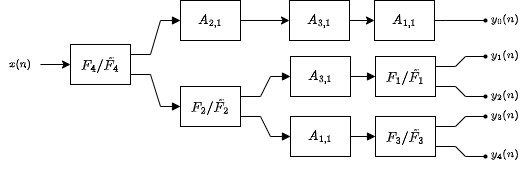

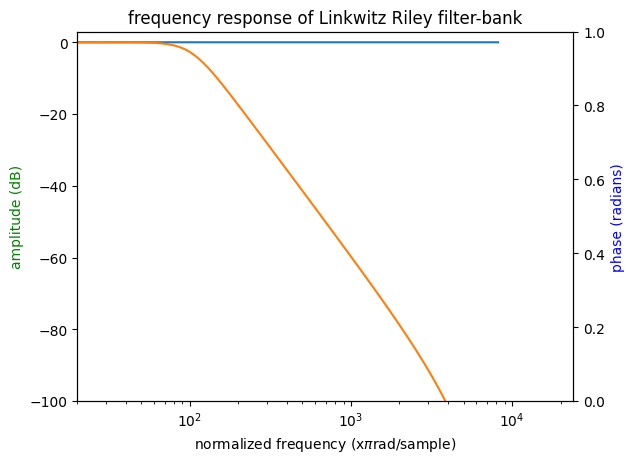

In [3]:
w, apf11 = signal.freqz(A1[0], A1[1], length)
w, apf21 = signal.freqz(A2[0], A2[1], length)
w, apf31 = signal.freqz(A3[0], A3[1], length)

w, f1  = signal.freqz(F1[0],  F1[1],  length)
w, f1_ = signal.freqz(F1_[0], F1_[1], length)
w, f2  = signal.freqz(F2[0],  F2[1],  length)
w, f2_ = signal.freqz(F2_[0], F2_[1], length)
w, f3  = signal.freqz(F3[0],  F3[1],  length)
w, f3_ = signal.freqz(F3_[0], F3_[1], length)
w, f4  = signal.freqz(F4[0],  F4[1],  length)
w, f4_ = signal.freqz(F4_[0], F4_[1], length)

amplitude  = 20 * np.log10(abs(
    f4 * apf21 * apf31 * apf11 +
    f4_ *  f2  * apf31 * f1    +
    f4_ *  f2  * apf31 * f1_   +
    f4_ *  f2_ * apf11 * f3    +
    f4_ *  f2_ * apf11 * f3_   ))

amplitude0 = 20 * np.log10(abs(f4))
# amplitude1 = 20 * np.log10(abs(f4_ *  f2  * apf31 * f1))
# amplitude2 = 20 * np.log10(abs(f4_ *  f2  * apf31 * f1_))
# amplitude3 = 20 * np.log10(abs(f4_ *  f2_ * apf11 * f3))
# amplitude4 = 20 * np.log10(abs(f4_ *  f2_ * apf11 * f3_ ))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(amplitude)
ax1.plot(amplitude0)
# ax1.plot(amplitude1)
# ax1.plot(amplitude2)
# ax1.plot(amplitude3)
# ax1.plot(amplitude4)

ax1.set_ylim(-100, 3)
ax1.set_xlim(20, 24000)

plt.title('frequency response of Linkwitz Riley filter-bank')
ax1.set_xlabel(r'normalized frequency (x$\pi$rad/sample)')
ax1.set_ylabel('amplitude (dB)', color='g')
ax2.set_ylabel('phase (radians)', color='b')
plt.xscale('log')
plt.show()

In [4]:
print(A1[0][0], ",",  A1[0][1], ",",  A1[0][2], ",",  A1[0][3])
print(F1[0][0], ",",  F1[0][1], ",",  F1[0][2], ",",  F1[0][3])
print(F1_[0][0], ",", F1_[0][1], ",", F1_[0][2], ",", F1_[0][3])
print(F1_[1][0], ",", F1_[1][1], ",", F1_[1][2], ",", F1_[1][3])

0.924502631888101 , -2.7731714749746215 , 2.7735078956643036 , -0.9243904916582072
5.607011494695888e-05 , 0.00016821034484087666 , 0.00016821034484087666 , 5.607011494695888e-05
0.9244465617731541 , -2.7733396853194625 , 2.7733396853194625 , -0.9244465617731541
1.0 , -2.8429605242024802 , 2.6980105275524044 , -0.8546014424303482


In [5]:
print(A2[0][0], ",",  A2[0][1], ",",  A2[0][2], ",", A2[0][3])
print(F2[0][0], ",",  F2[0][1], ",",  F2[0][2], ",", F2[0][3])
print(F2_[0][0], ",", F2_[0][1], ",", F2_[0][2], ",", F2_[0][3])
print(F2_[1][0], ",", F2_[1][1], ",", F2_[1][2], ",", F2_[1][3])

0.8549137777416183 , -2.5622420563904003 , 2.5647413332248545 , -0.8540806854634668
0.00041654613907574626 , 0.0012496384172272388 , 0.0012496384172272388 , 0.00041654613907574626
0.8544972316025425 , -2.5634916948076274 , 2.5634916948076274 , -0.8544972316025425
1.0 , -2.686157396548144 , 2.419655110966473 , -0.7301653453057232


In [6]:
print(A3[0][0], ",",  A3[0][1], ",",  A3[0][2], ",",  A3[0][3])
print(F3[0][0], ",",  F3[0][1], ",",  F3[0][2], ",",  F3[0][3])
print(F3_[0][0], ",", F3_[0][1], ",", F3_[0][2], ",", F3_[0][3])
print(F3_[1][0], ",", F3_[1][1], ",", F3_[1][2], ",", F3_[1][3])

0.5457233155094576 , -1.5285763484832862 , 1.6371699465283729 , -0.5095254494944288
0.018098933007514435 , 0.05429679902254331 , 0.05429679902254331 , 0.018098933007514435
0.5276243825019432 , -1.5828731475058295 , 1.5828731475058295 , -0.5276243825019432
1.0 , -1.760041880343169 , 1.182893262037831 , -0.2780599176345465


In [7]:
print(F4[0][0], ",",  F4[0][1], ",",  F4[0][2], ",",  F4[0][3])
print(F4_[0][0], ",", F4_[0][1], ",", F4_[0][2], ",", F4_[0][3])
print(F4_[1][0], ",", F4_[1][1], ",", F4_[1][2], ",", F4_[1][3])

7.281172475050372e-06 , 2.1843517425151117e-05 , 2.1843517425151117e-05 , 7.281172475050372e-06
0.9614887327678036 , -2.8844661983034108 , 2.8844661983034108 , -0.9614887327678036
1.0 , -2.9214652231948923 , 2.845984055761114 , -0.9244605831864211


In [8]:
#     double a1[] = { 0.9384318, -4.69215899,  9.38431804, -9.38431799,  4.69215902, -0.9384318 };
#     double f1[] = { 2.74050910e-09, 1.37025455e-08, 2.74050910e-08, 2.74050910e-08, 1.37025455e-08, 2.74050910e-09 };
#     double f1_[] = { 0.9384318, -4.69215901,  9.38431801, -9.38431801,  4.69215901, -0.9384318 };
#     double denominator1[] = { 1.0, -4.87292229,  9.49972611, -9.26133224,  4.51518275, -0.88065425 };

#     double a2[] = { 0.77531894, -3.87657127,  7.75318936, -7.75314254,  3.87659468, -0.77531425 };
#     double f2[] = { 2.34099149e-06, 1.17049575e-05, 2.34099149e-05, 2.34099149e-05, 1.17049575e-05, 2.34099149e-06 };
#     double f2_[] = { 0.7753166, -3.87658298,  7.75316595, -7.75316595,  3.87658298, -0.7753166 };
#     double denominator2[] = { 1.0, -4.49183097,  8.09405542, -7.31208128,  3.31104756, -0.60111582 };

#     double a3[] = { 0.35544676, -1.764408  ,  3.55446762, -3.528816  ,  1.77723381, -0.3528816 };
#     double f3[] = { 0.00128258, 0.00641291, 0.01282581, 0.01282581, 0.00641291, 0.00128258 };
#     double f3_[] = { 0.35416418, -1.77082091,  3.54164181, -3.54164181,  1.77082091, -0.35416418 };
#     double denominator3[] = { 1.0, -2.97542211,  3.80601812, -2.54525287,  0.88113008, -0.12543062 };

#     double f4[] = { 2.80522776e-12, 1.40261388e-11, 2.80522776e-11, 2.80522776e-11, 1.40261388e-11, 2.80522776e-12 };
#     double f4_[] = { 0.98424041, -4.92120206,  9.84240412, -9.84240412, 4.92120206, -0.98424041 };
#     double denominator4[] = { 1.0, -4.96823001,  9.87342414, -9.81088739, 4.87442246, -0.96872919 };

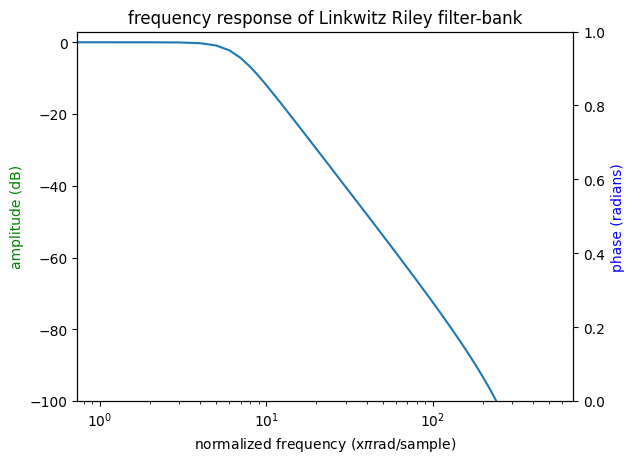

In [12]:
w, h = signal.freqz(F4[0], F4[1])

amplitude = 20 * np.log10(abs(h))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(amplitude)


ax1.set_ylim(-100, 3)
# ax1.set_xlim(20, 24000)

plt.title('frequency response of Linkwitz Riley filter-bank')
ax1.set_xlabel(r'normalized frequency (x$\pi$rad/sample)')
ax1.set_ylabel('amplitude (dB)', color='g')
ax2.set_ylabel('phase (radians)', color='b')
plt.xscale('log')
plt.show()

In [13]:
print(F4[0])
print(F4[1])

[7.28117248e-06 2.18435174e-05 2.18435174e-05 7.28117248e-06]
[ 1.         -2.92146522  2.84598406 -0.92446058]
